<a href="https://colab.research.google.com/github/Thomascc123/Proyecto-Kaggle-Modelos/blob/master/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Carga Del Archivo

In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.32GB/s]


## Descomprimiendo

In [8]:
!unzip udea*.zip > /dev/null

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
example = pd.read_csv('submission_example.csv')

In [10]:
train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Limpeza de las columnas

In [11]:
train.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [12]:
train.isnull().mean()*100

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


In [13]:
traincopy = train.copy()

In [14]:
def viewValues(df, column):
  print(df[column].fillna("null", inplace=False).value_counts())
  df[column].fillna("null", inplace=False).value_counts().plot(kind='bar')

In [15]:
def fillDefault(df, column, value):
  df[column].fillna(value, inplace=True)

In [86]:
def compareDiscreteValues(df, column):
  #fig, axes = plt.subplots(1, 2, figsize=(16, 5))

  comparision = pd.crosstab(df[column].fillna("null", inplace=False), df['RENDIMIENTO_GLOBAL'])
  sns.heatmap(comparision)#, ax=axes[0])

  #sns.stripplot(x=column, y='RENDIMIENTO_GLOBAL', data=df, jitter=True, ax=axes[1])

In [44]:
def replaceNullByList(df, column, list):
  numNulls = df[column].isna().sum()
  ramdomReplaces = np.random.choice(list, size=numNulls, replace=True)
  df[column].loc[df[column].isna()] = ramdomReplaces

In [51]:
def getDistincValues(df, column):
  return df[column][~df[column].isna()].unique().tolist()

### E_VALORMATRICULAUNIVERSIDAD

E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
null                                          6287
Name: count, dtype: int64


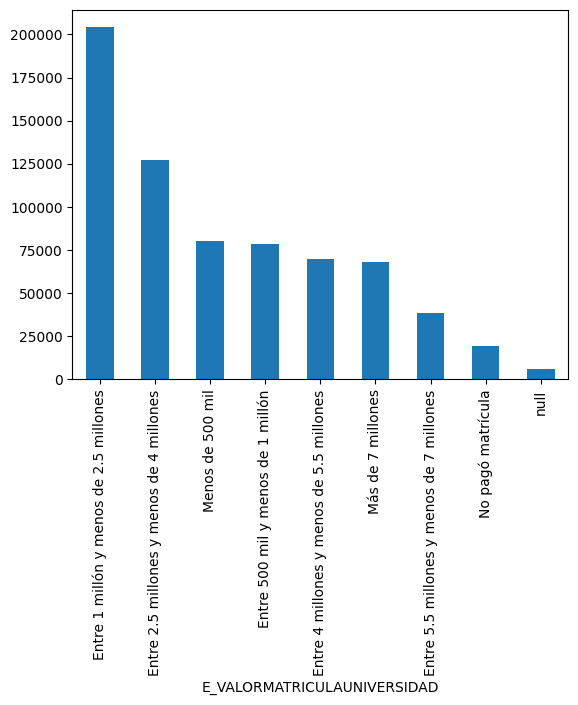

In [30]:
viewValues(train, "E_VALORMATRICULAUNIVERSIDAD")

In [17]:
#traincopy['E_VALORMATRICULAUNIVERSIDAD'].fillna("No pagó matrícula", inplace=True)
fillDefault(traincopy, 'E_VALORMATRICULAUNIVERSIDAD', "No pagó matrícula")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            25815
Name: count, dtype: int64


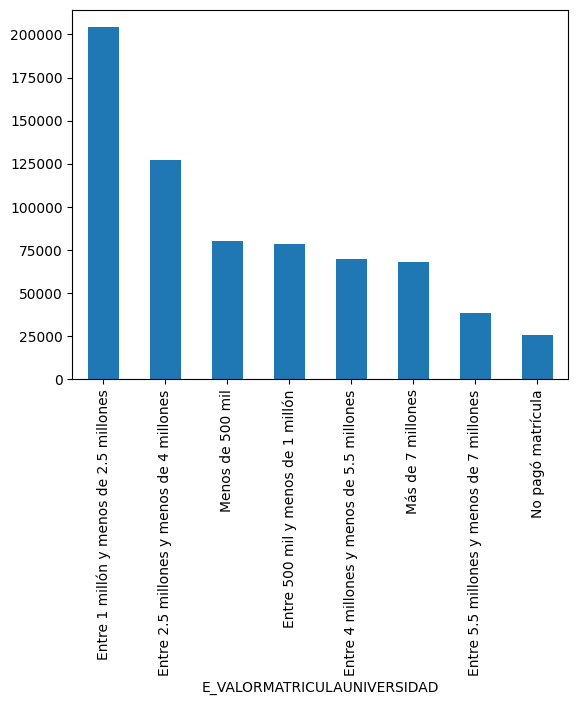

In [18]:
viewValues(traincopy, 'E_VALORMATRICULAUNIVERSIDAD')

### E_HORASSEMANATRABAJA

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
null                    30857
Name: count, dtype: int64


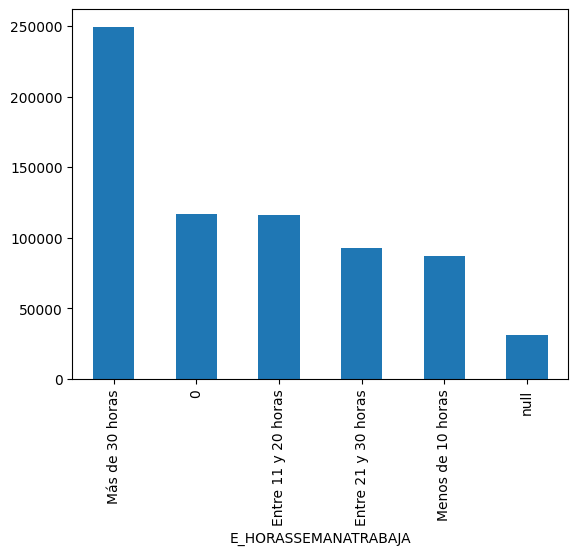

In [19]:
viewValues(train, 'E_HORASSEMANATRABAJA')

In [20]:
fillDefault(traincopy, 'E_HORASSEMANATRABAJA', "0")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      147407
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


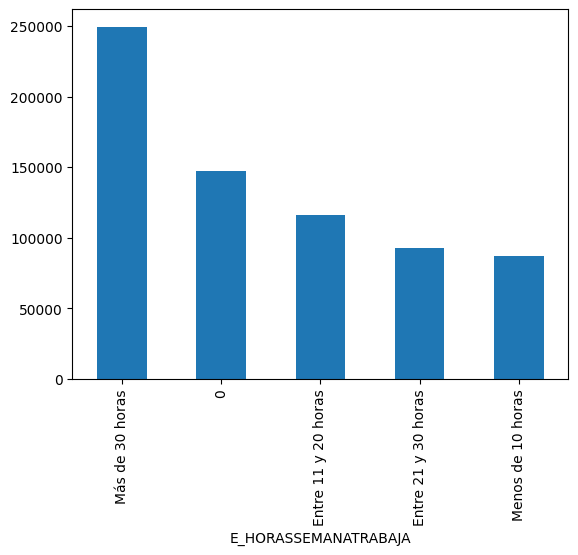

In [21]:
viewValues(traincopy, 'E_HORASSEMANATRABAJA')

## F_ESTRATOVIVIENDA

F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
null            32137
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


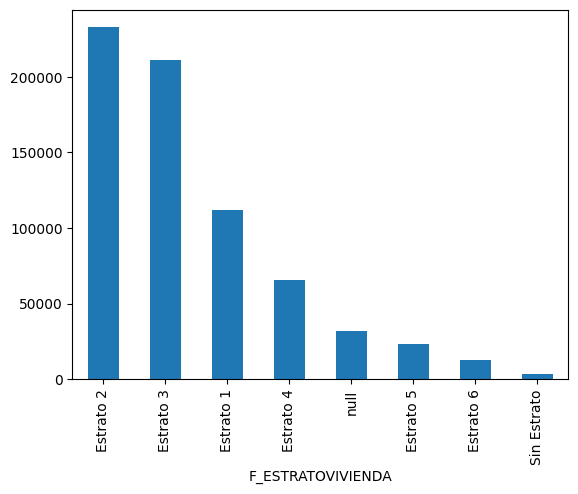

In [22]:
viewValues(train, 'F_ESTRATOVIVIENDA')

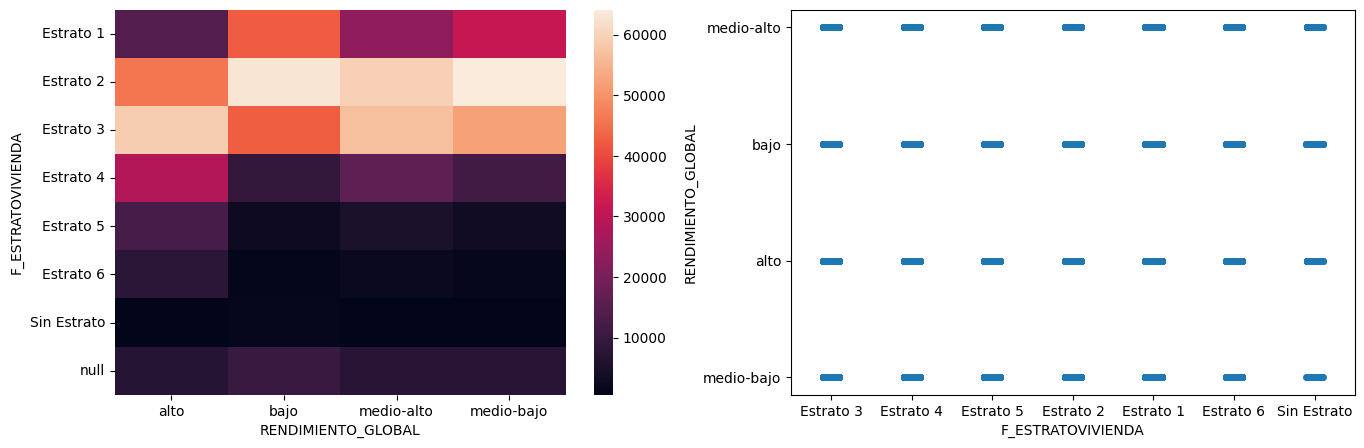

In [83]:
compareDiscreteValues(train, 'F_ESTRATOVIVIENDA')

In [52]:
columnValues = getDistincValues(traincopy, 'F_ESTRATOVIVIENDA')
print(columnValues)
replaceNullByList(traincopy, 'F_ESTRATOVIVIENDA', columnValues)

['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1', 'Estrato 6', 'Sin Estrato']


/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].loc[df[column].isna()] = ramdomReplaces


F_ESTRATOVIVIENDA
Estrato 2      237384
Estrato 3      215263
Estrato 1      116543
Estrato 4       70171
Estrato 5       28192
Estrato 6       17095
Sin Estrato      7852
Name: count, dtype: int64


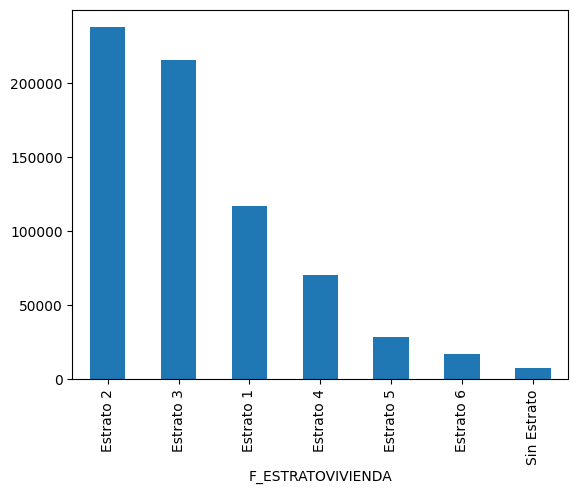

In [53]:
viewValues(traincopy, 'F_ESTRATOVIVIENDA')

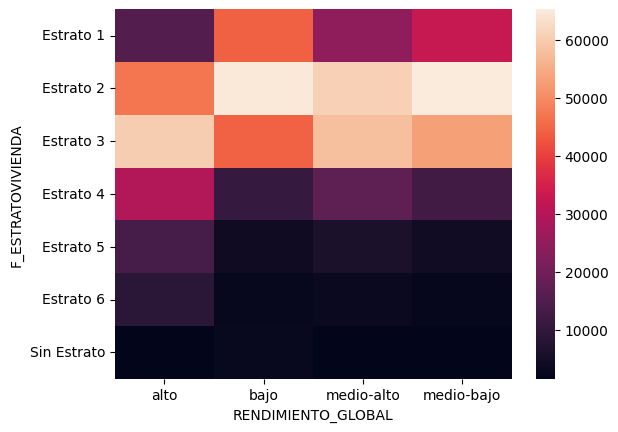

In [54]:
compareDiscreteValues(traincopy, 'F_ESTRATOVIVIENDA')

## F_TIENEINTERNET

F_TIENEINTERNET
Si      592514
No       73357
null     26629
Name: count, dtype: int64


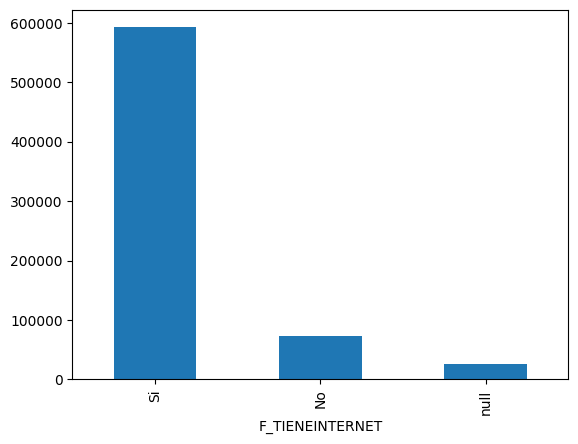

In [50]:
viewValues(train, 'F_TIENEINTERNET')

In [56]:
fillDefault(traincopy, 'F_TIENEINTERNET', "No")

/tmp/ipython-input-1262110709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traincopy['F_TIENEINTERNET'].fillna("No", inplace=True)


F_TIENEINTERNET
Si    592514
No     99986
Name: count, dtype: int64


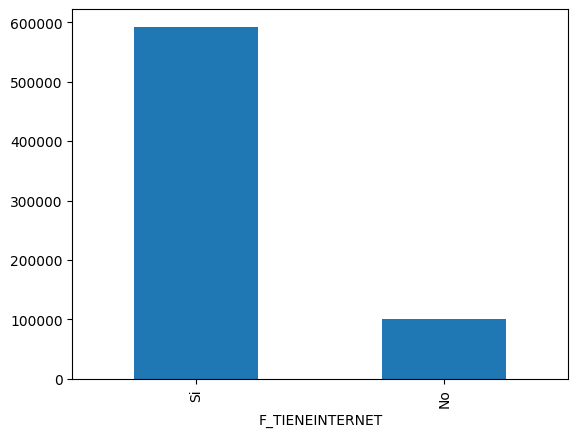

In [57]:
viewValues(traincopy, 'F_TIENEINTERNET')

## F_EDUCACIONPADRE

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
null                                     23178
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


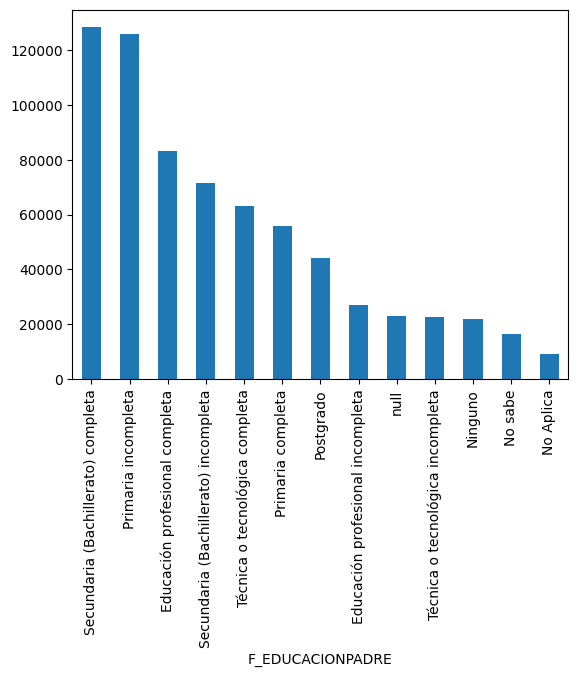

In [58]:
viewValues(train, 'F_EDUCACIONPADRE')

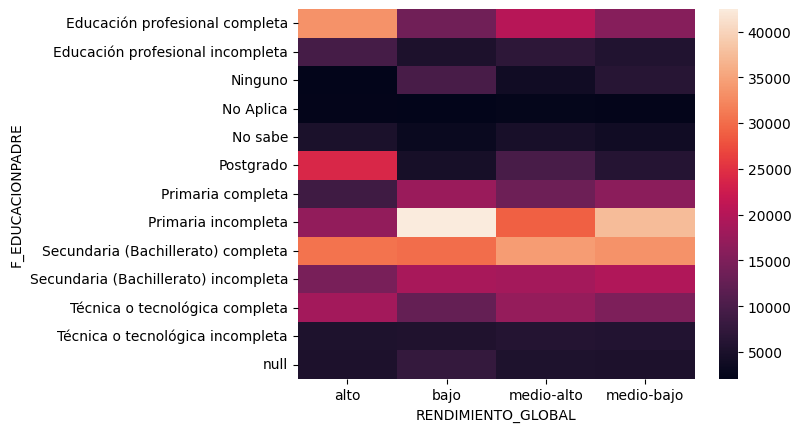

In [59]:
compareDiscreteValues(train, 'F_EDUCACIONPADRE')

In [61]:
columnValues = getDistincValues(traincopy, 'F_EDUCACIONPADRE')
print(columnValues)
replaceNullByList(traincopy, 'F_EDUCACIONPADRE', columnValues)

['Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'No sabe', 'Primaria completa', 'Educación profesional completa', 'Educación profesional incompleta', 'Primaria incompleta', 'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno', 'No Aplica']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      130209
Primaria incompleta                     127604
Educación profesional completa           85054
Secundaria (Bachillerato) incompleta     73581
Técnica o tecnológica completa           64937
Primaria completa                        57900
Postgrado                                46107
Educación profesional incompleta         28988
Técnica o tecnológica incompleta         24495
Ninguno                                  23906
No sabe                                  18527
No Aplica                                11192
Name: count, dtype: int64


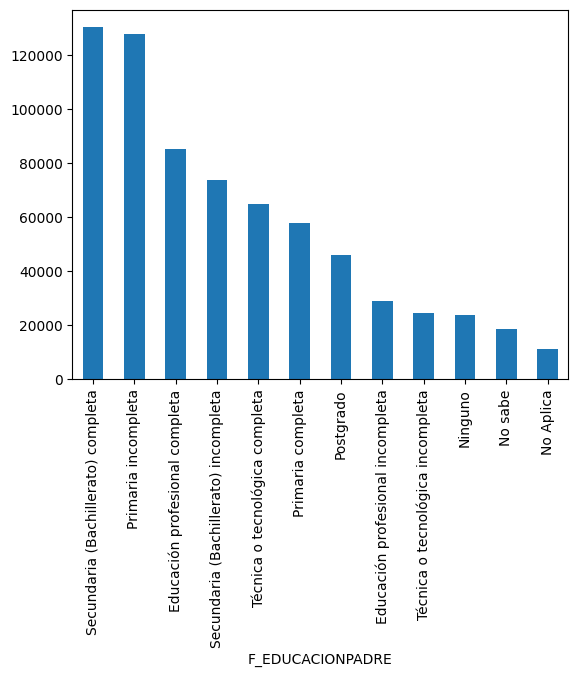

In [62]:
viewValues(traincopy, 'F_EDUCACIONPADRE')

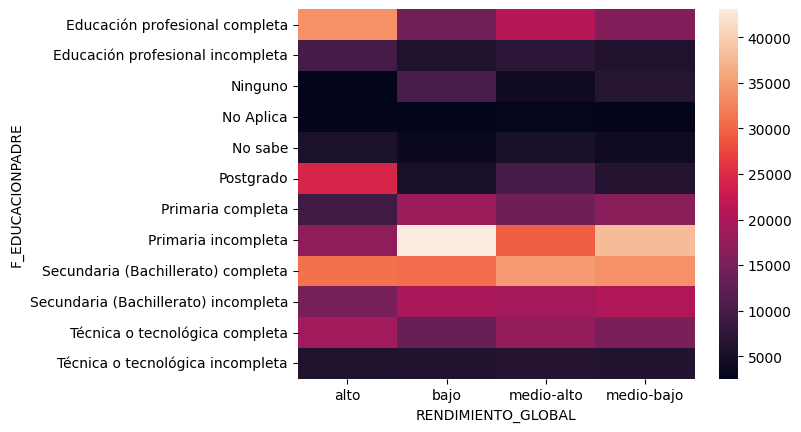

In [63]:
compareDiscreteValues(traincopy, 'F_EDUCACIONPADRE')

## F_TIENELAVADORA

F_TIENELAVADORA
Si      563390
No       89337
null     39773
Name: count, dtype: int64


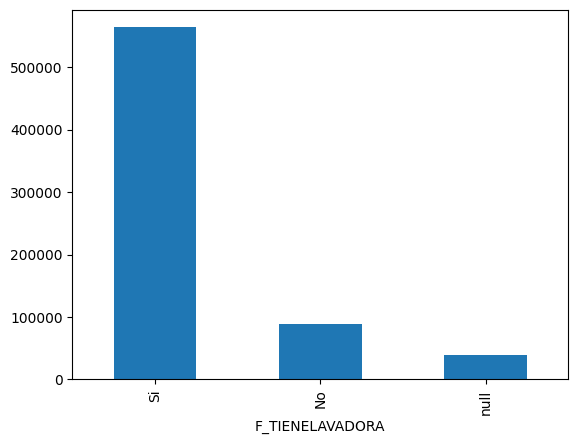

In [64]:
viewValues(train, 'F_TIENELAVADORA')

In [65]:
fillDefault(traincopy, 'F_TIENELAVADORA', "No")

/tmp/ipython-input-4244883059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traincopy['F_TIENELAVADORA'].fillna("No", inplace=True)


F_TIENELAVADORA
Si    563390
No    129110
Name: count, dtype: int64


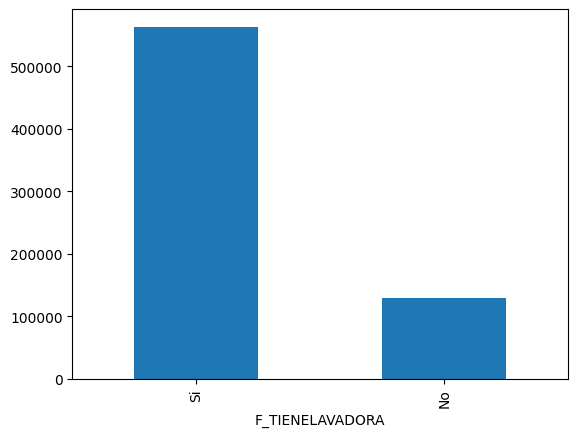

In [67]:
viewValues(traincopy, 'F_TIENELAVADORA')

## F_TIENEAUTOMOVIL

F_TIENEAUTOMOVIL
No      412606
Si      236271
null     43623
Name: count, dtype: int64


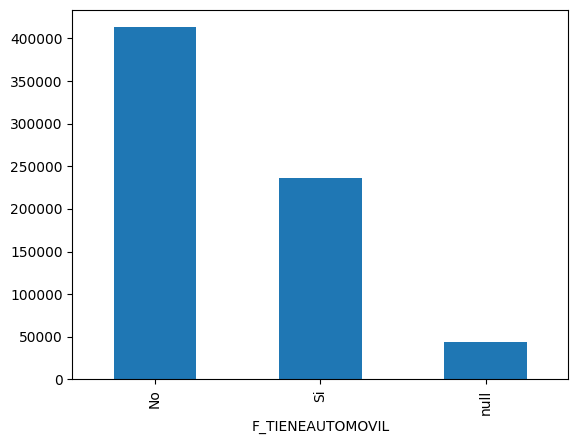

In [68]:
viewValues(train, 'F_TIENEAUTOMOVIL')

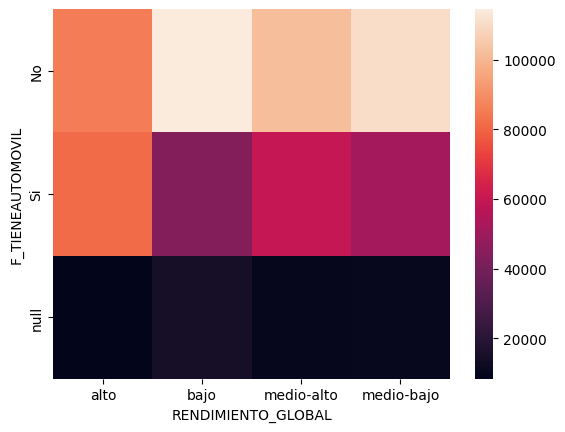

In [87]:
compareDiscreteValues(train, 'F_TIENEAUTOMOVIL')

In [92]:
columnValues = getDistincValues(traincopy, 'F_TIENEAUTOMOVIL')
print(columnValues)
replaceNullByList(traincopy, 'F_TIENEAUTOMOVIL', columnValues)

['Si', 'No']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_TIENEAUTOMOVIL
No    434445
Si    258055
Name: count, dtype: int64


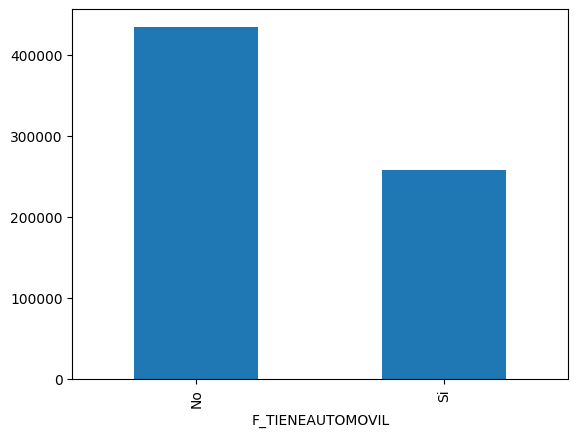

In [93]:
viewValues(traincopy, 'F_TIENEAUTOMOVIL')

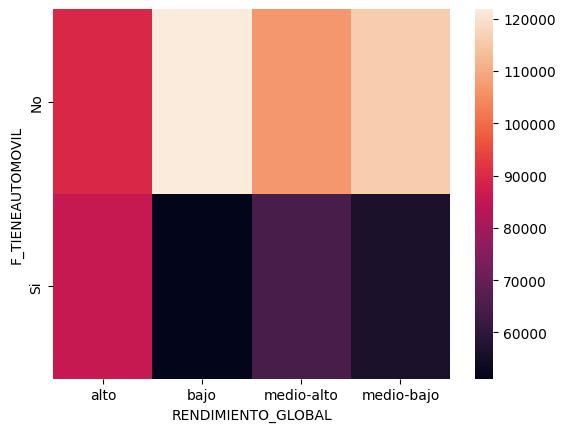

In [94]:
compareDiscreteValues(traincopy, 'F_TIENEAUTOMOVIL')

## E_PAGOMATRICULAPROPIO

E_PAGOMATRICULAPROPIO
No      382201
Si      303801
null      6498
Name: count, dtype: int64


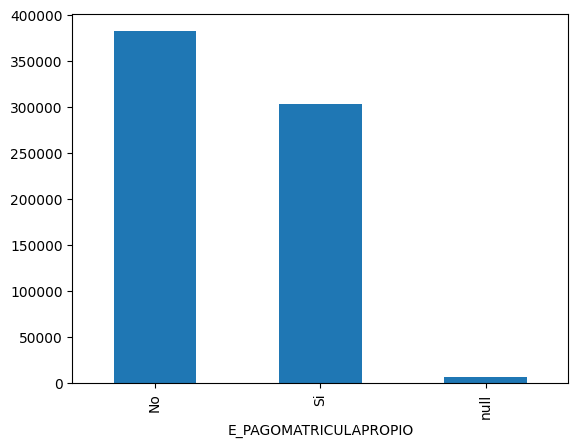

In [95]:
viewValues(train, 'E_PAGOMATRICULAPROPIO')

In [101]:
fillDefault(traincopy, 'E_PAGOMATRICULAPROPIO', "No")

E_PAGOMATRICULAPROPIO
No    388699
Si    303801
Name: count, dtype: int64


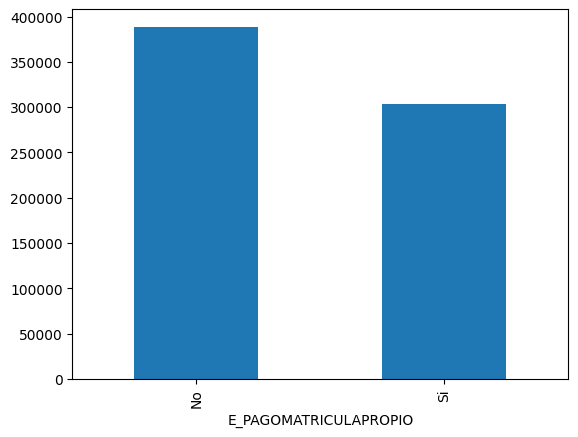

In [102]:
viewValues(traincopy, 'E_PAGOMATRICULAPROPIO')

## F_TIENECOMPUTADOR

F_TIENECOMPUTADOR
Si      597670
No       56727
null     38103
Name: count, dtype: int64


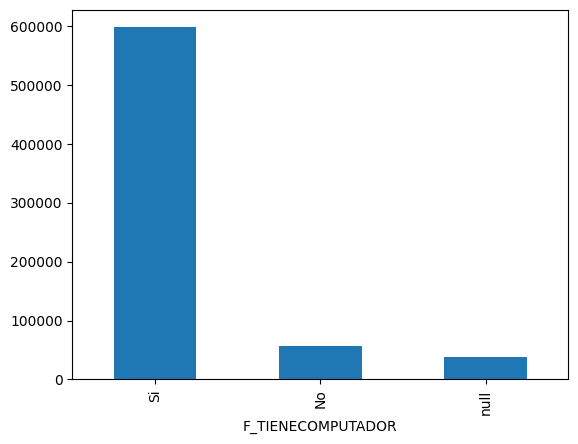

In [103]:
viewValues(train, 'F_TIENECOMPUTADOR')

In [104]:
fillDefault(traincopy, 'F_TIENECOMPUTADOR', "No")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


F_TIENECOMPUTADOR
Si    597670
No     94830
Name: count, dtype: int64


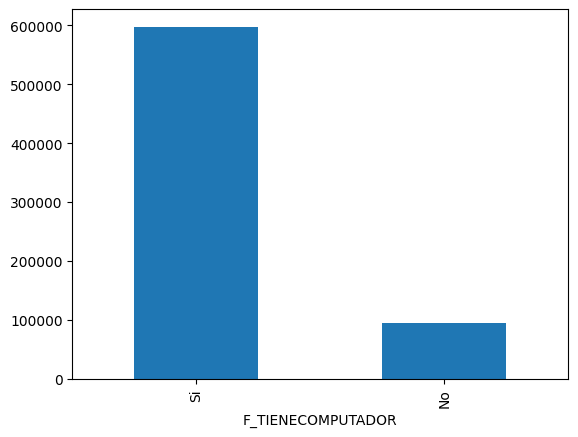

In [105]:
viewValues(traincopy, 'F_TIENECOMPUTADOR')

## F_TIENEINTERNET.1

F_TIENEINTERNET.1
Si      592514
No       73357
null     26629
Name: count, dtype: int64


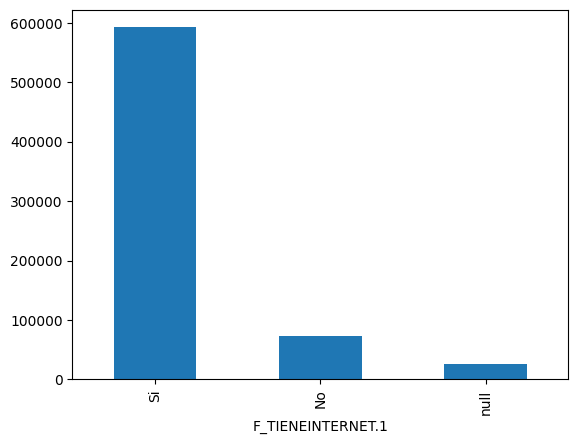

In [106]:
viewValues(train,'F_TIENEINTERNET.1')

F_TIENEINTERNET
Si      592514
No       73357
null     26629
Name: count, dtype: int64


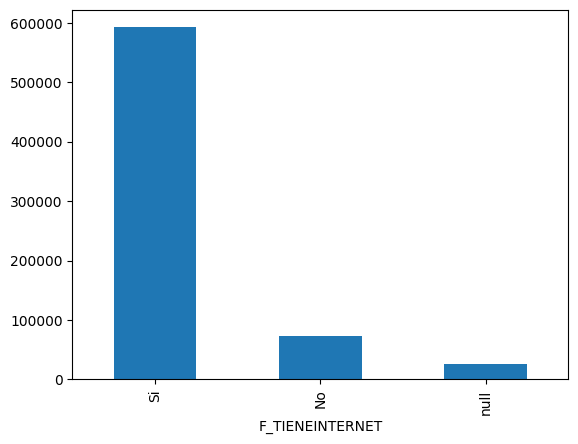

In [107]:
viewValues(train,'F_TIENEINTERNET')

In [110]:
(train['F_TIENEINTERNET.1'] == train['F_TIENEINTERNET']).mean()*100

np.float64(96.15465703971118)